In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
# Load the dataset
dataset_path = r'Data\creditcard.csv'
df = pd.read_csv(dataset_path)

dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1


In [6]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)


In [7]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])


In [8]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]

def predict(X, theta):
    z = np.dot(X, theta)
    return softmax(z)

def compute_loss(y_hat, y):
    n = y.size
    return (-1 / n) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
    n = y.size
    return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    return (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()


In [9]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))


In [10]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)
    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

    train_losses.append(np.mean(train_batch_losses))
    val_losses.append(np.mean(val_batch_losses))
    train_accs.append(np.mean(train_batch_accs))
    val_accs.append(np.mean(val_batch_accs))

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_losses[-1]:.3f}\tValidation loss: {val_losses[-1]:.3f}')



EPOCH 1:	Training loss: 0.300	Validation loss: 0.222

EPOCH 2:	Training loss: 0.176	Validation loss: 0.137

EPOCH 3:	Training loss: 0.115	Validation loss: 0.094

EPOCH 4:	Training loss: 0.081	Validation loss: 0.069

EPOCH 5:	Training loss: 0.062	Validation loss: 0.054

EPOCH 6:	Training loss: 0.049	Validation loss: 0.044

EPOCH 7:	Training loss: 0.041	Validation loss: 0.037

EPOCH 8:	Training loss: 0.035	Validation loss: 0.033

EPOCH 9:	Training loss: 0.031	Validation loss: 0.029

EPOCH 10:	Training loss: 0.028	Validation loss: 0.026

EPOCH 11:	Training loss: 0.025	Validation loss: 0.024

EPOCH 12:	Training loss: 0.023	Validation loss: 0.022

EPOCH 13:	Training loss: 0.021	Validation loss: 0.020

EPOCH 14:	Training loss: 0.020	Validation loss: 0.019

EPOCH 15:	Training loss: 0.019	Validation loss: 0.018

EPOCH 16:	Training loss: 0.017	Validation loss: 0.017

EPOCH 17:	Training loss: 0.017	Validation loss: 0.016

EPOCH 18:	Training loss: 0.016	Validation loss: 0.015

EPOCH 19:	Training

In [11]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc}')
print(f'Test Accuracy: {test_set_acc}')


Evaluation on validation and test set:
Validation Accuracy: 0.9993153330290369
Test Accuracy: 0.9992275552122467


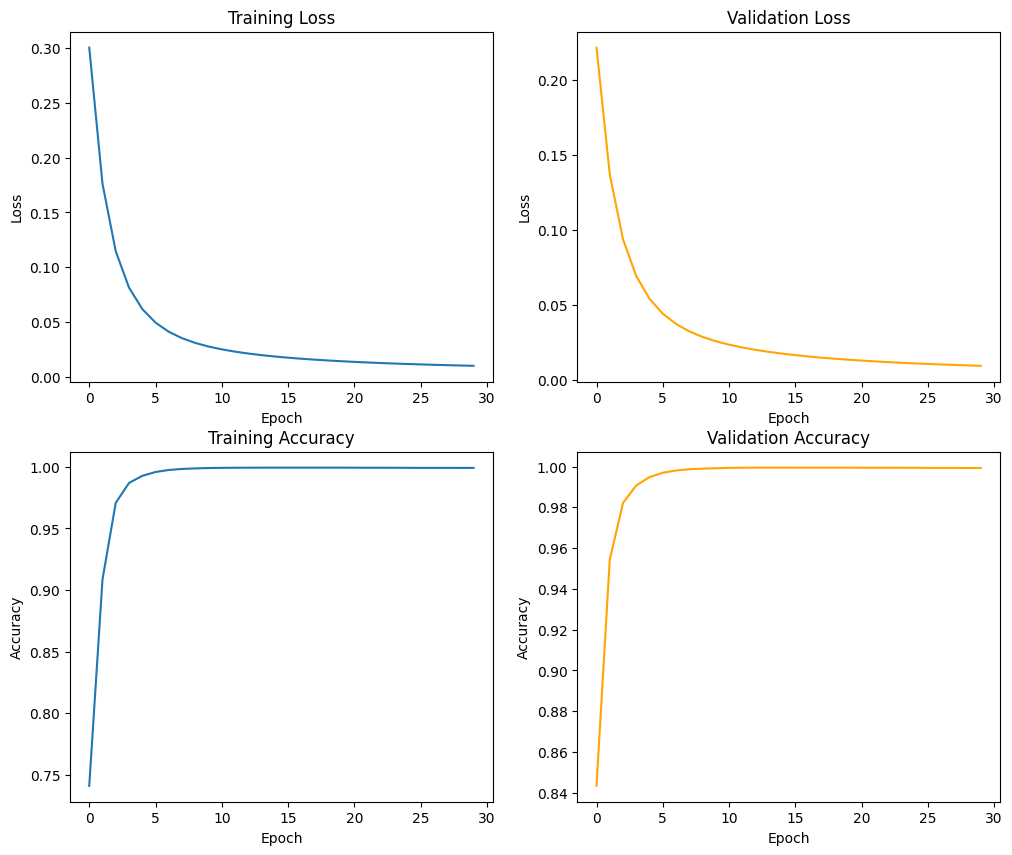

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()


In [13]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print("Evaluation on validation and test set:")
print(f"Validation Accuracy: {val_set_acc}")
print(f"Test Accuracy: {test_set_acc}")


Evaluation on validation and test set:
Validation Accuracy: 0.9993153330290369
Test Accuracy: 0.9992275552122467
